# Code shows you
- How to do some basic analysis (1) where was the model wrong, (2) where were the boundaries wrong, ...


- How to plot a confusion matrix to see the confusion between the output of the model and the gold standard (aspect data)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# It's not really a tsv
nuner = pd.read_csv("/INSERT-PATH/NuNER_Joint.tsv", sep=' ', header =  None)
roberta = pd.read_csv("INSERT-PATH/RoBERTa_Joint.tsv", sep=' ', header =  None)
twitter = pd.read_csv("/INSERT-PATH/Twitter_RoBERTa_Joint.tsv", sep=' ', header =  None)

In [ ]:
nuner.rename(columns={0: 'text', 1: 'gold_standard', 2: 'output_nuner'}, inplace=True)
roberta.rename(columns={0: 'text', 1: 'gold_standard', 2: 'output_roberta'}, inplace=True)
twitter.rename(columns={0: 'text', 1: 'gold_standard', 2: 'output_twitter'}, inplace=True)

In [ ]:
# check if gold standard is equal across dataframes (to make sure it's the gold standard)
list(nuner["gold_standard"]) == list(roberta["gold_standard"]) == list(twitter["gold_standard"])

True

In [ ]:
twitter.drop(columns=["gold_standard", "text"], inplace=True)
roberta.drop(columns=["gold_standard", "text"], inplace=True)

In [ ]:
full_df = pd.concat([nuner, roberta, twitter], axis=1)

In [ ]:
# all outputs from all models compared
full_df

,text,gold_standard,output_nuner,output_roberta,output_twitter
0,Loved,O,O,O,O
1,the,O,O,O,O
2,writing,B-style,B-style,B-style,B-style
3,style,I-style,I-style,B-style,B-style
4,the,O,O,O,O
...,...,...,...,...,...
5110,filled,I-reading,B-reading,B-reading,O
5111,with,I-reading,I-reading,I-reading,O
5112,such,I-reading,I-reading,I-reading,O
5113,glee,I-reading,I-reading,I-reading,B-NULL_aspect


In [ ]:
## check perfect overlaps

full_df[(full_df["gold_standard"]==full_df["output_roberta"])]

,text,gold_standard,output_nuner,output_roberta,output_twitter
0,Loved,O,O,O,O
1,the,O,O,O,O
2,writing,B-style,B-style,B-style,B-style
4,the,O,O,O,O
5,line,B-style,B-style,B-style,B-style
...,...,...,...,...,...
5106,one,O,O,O,O
5107,.,O,O,O,O
5111,with,I-reading,I-reading,I-reading,O
5112,such,I-reading,I-reading,I-reading,O


In [ ]:
## check mistakes

full_df[(full_df["gold_standard"]!=full_df["output_twitter"])]

,text,gold_standard,output_nuner,output_roberta,output_twitter
3,style,I-style,I-style,B-style,B-style
18,line,I-style,I-style,B-style,B-style
21,my,I-NULL_aspect,I-NULL_aspect,B-NULL_aspect,B-NULL_aspect
29,Greek,O,O,O,B-canon
35,love,B-NULL_aspect,B-NULL_aspect,O,O
...,...,...,...,...,...
5110,filled,I-reading,B-reading,B-reading,O
5111,with,I-reading,I-reading,I-reading,O
5112,such,I-reading,I-reading,I-reading,O
5113,glee,I-reading,I-reading,I-reading,B-NULL_aspect


In [ ]:
# wrong boundary detected
full_df[(full_df["gold_standard"].str.contains("I") & full_df["output_twitter"].str.contains("B"))]

,text,gold_standard,output_nuner,output_roberta,output_twitter
3,style,I-style,I-style,B-style,B-style
18,line,I-style,I-style,B-style,B-style
21,my,I-NULL_aspect,I-NULL_aspect,B-NULL_aspect,B-NULL_aspect
53,smut,I-event,B-event,B-general,B-style
187,Patroclus,I-character,B-character,B-character,B-character
...,...,...,...,...,...
4936,life,I-event,I-event,I-event,B-event
5022,conversations,I-style,I-event,B-event,B-event
5038,telling,I-character,I-character,B-character,B-event
5045,a,I-character,I-character,B-event,B-character


# Some findings NuNER
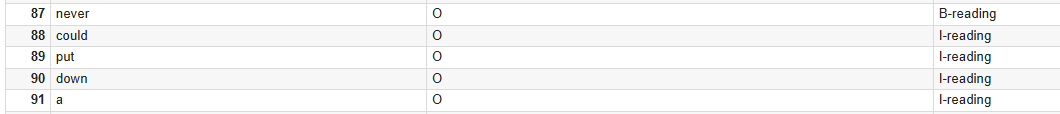

--> "couldn't put down" annotated by the model, but is it wrong as a "reading" entity?

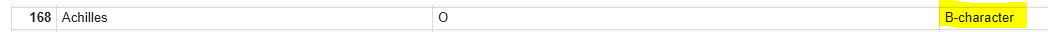

--> annotated as "character", is it wrong?

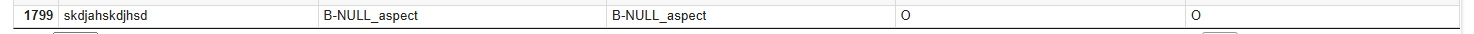

Nuner understands this gibberish holds emotional value hahah


# Some findings Roberta

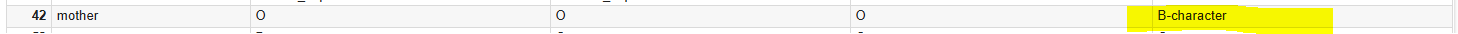

--> "mother" annotated as character by the model in following sentence:

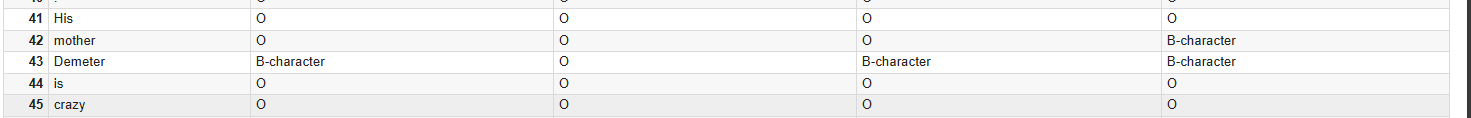

# Some findings general


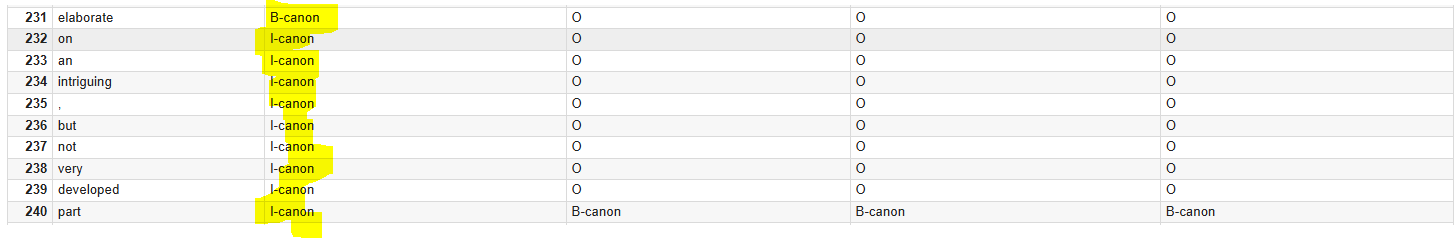

Canon seems to be difficult sometimes: all models predict this wrongly

General finding: the "emotion" category seems to be difficult for the models to grasp. Because of little annotations? See below.

In [ ]:
full_df[(full_df["gold_standard"].str.contains("NULL"))]

,text,gold_standard,output_nuner,output_roberta,output_twitter
20,Oh,B-NULL_aspect,B-NULL_aspect,B-NULL_aspect,B-NULL_aspect
21,my,I-NULL_aspect,I-NULL_aspect,B-NULL_aspect,B-NULL_aspect
22,God,I-NULL_aspect,I-NULL_aspect,B-NULL_aspect,I-NULL_aspect
35,love,B-NULL_aspect,B-NULL_aspect,O,O
36,and,I-NULL_aspect,O,O,O
...,...,...,...,...,...
4973,I,B-NULL_aspect,O,O,O
4974,take,B-NULL_aspect,O,O,O
4975,my,I-NULL_aspect,O,O,O
4976,hat,I-NULL_aspect,O,O,O


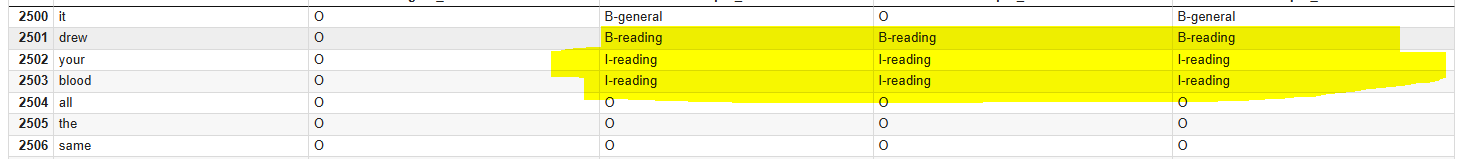

Interesting: "drew your blood all the same" not annotated in gold standard, but all models interpret it as a reading experience in this context.


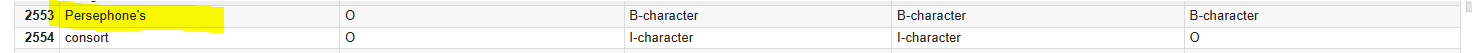

Could this be a missed entity in the gold standard? Or did you not annotate this on purpose for some reason?

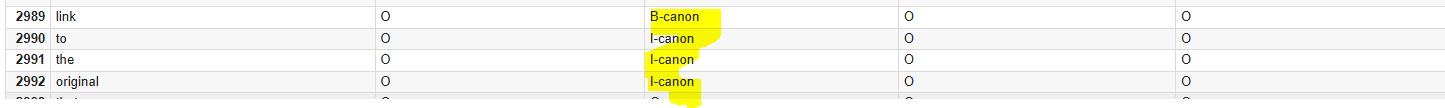

Model seems to kind of contextually understand that "the original" is a canon reference :-)

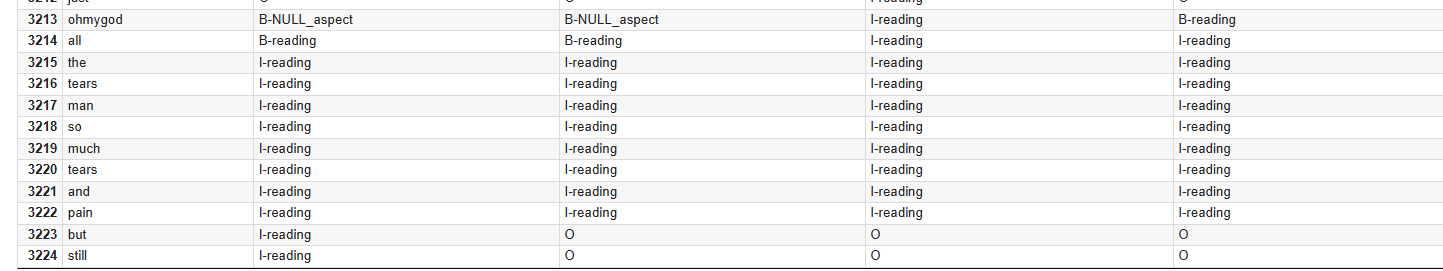

Cool, all models get this overjoyed xperience correctly

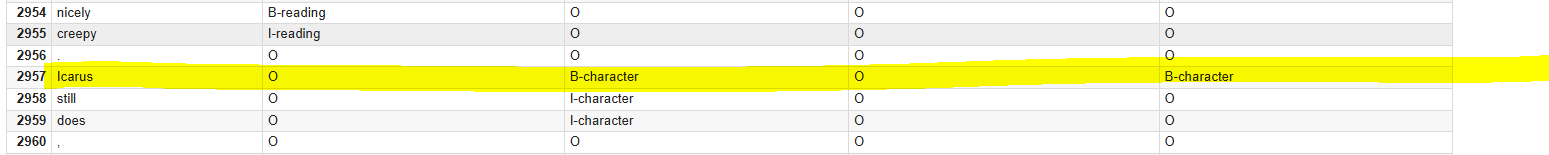

Not a character in the gold standard - is this correct?

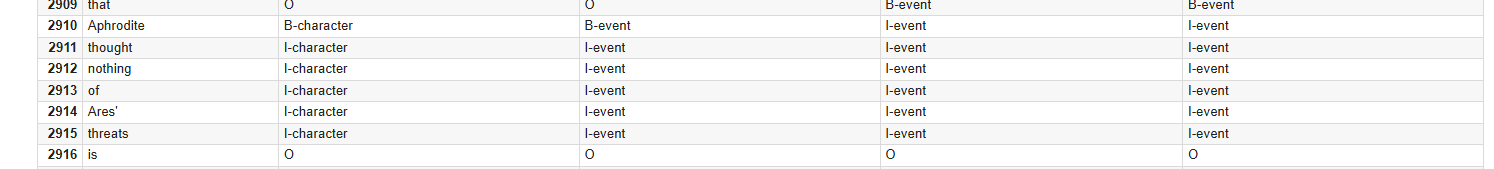

Interesting, all models think this is an event :)
In a sense they're not wrong, I suppose. Thinking nothing of...

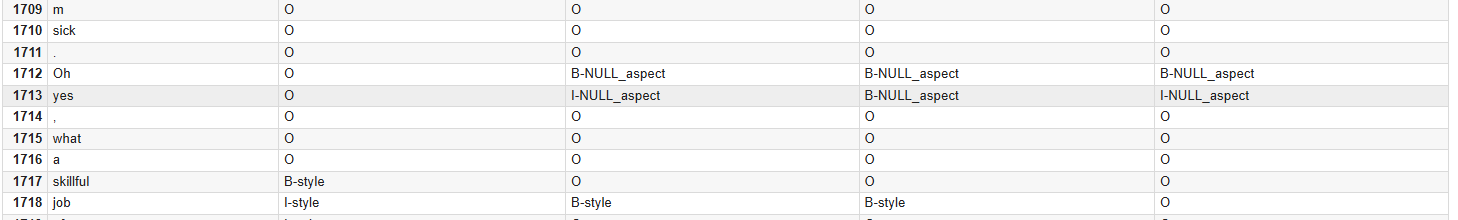

"Oh Yes"- all models see this as a valent aspect while annotations deny this. interesting. Not necessarily wrong right?

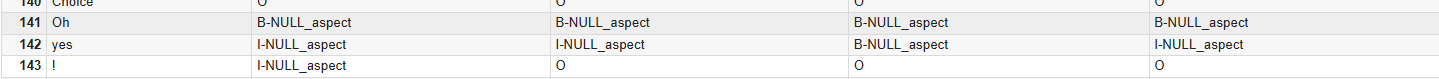

Related to finding above: Oh yes is annotated in the GS here while it isn't in the other example. Might be because of context. But interesting nonetheless, probably explains why it wasn't annotated before.

# Make confusion matrix

In [ ]:
def remove_iob(x):
  if "B" in x:
    return x.replace("B-", "")
  elif "I" in x:
    return x.replace("I-", "")
  else:
    return x

In [ ]:
full_df["gold_standard_2"] = full_df["gold_standard"].apply(remove_iob)
full_df["output_2"] = full_df["output_roberta"].apply(remove_iob)

In [ ]:
y_true = full_df['gold_standard_2']
y_pred = full_df['output_2']

In [ ]:
cf = confusion_matrix(y_true, y_pred)

In [ ]:
labels = sorted(set(y_true))

<Axes: >

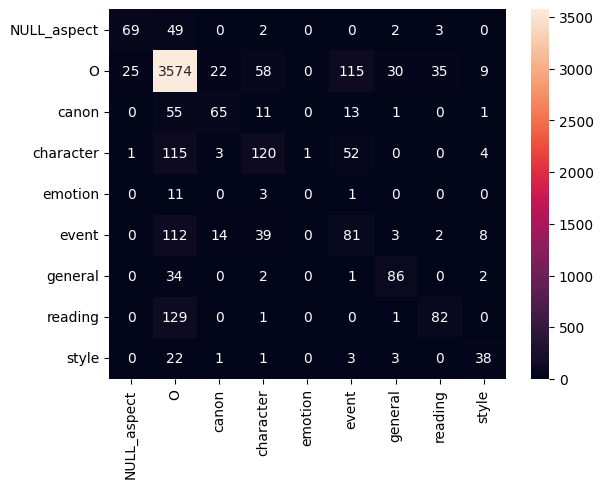

In [ ]:
# confusion matrix tussen output van het model (nuner) en gold standard
sns.heatmap(cf, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")